In [2]:
#Isidora Castro, María Amalia Díaz. Sección 1

#obtención de tableros

import urllib.request as ureq
import random

url = "https://projecteuler.net/project/resources/p096_sudoku.txt" #el link de los tableros

def obtener_tableros_sudoku(url): #función para sacarlos
    try:
        response = ureq.urlopen(url) #se abre
        contenido = response.read().decode("utf-8")
        lineas = contenido.split('\n') #dividimos con saltos de linea el contenido de la página
        
        tableros = [] #lista de 50 tableros
        tablero_actual = []
        leyendo_tablero = False
        
        for linea in lineas:
            if linea.startswith("Grid"): #mientras la línea empiece con Grid sé q es tablero
                if leyendo_tablero:              
                    tableros.append(tablero_actual)
                    tablero_actual = [] 
                leyendo_tablero = True
            elif leyendo_tablero and len(linea) > 0: #si no empieza con grid agrego los números 
                tablero_actual.append([int(digito) for digito in linea])
        
        if tablero_actual:
            tableros.append(tablero_actual)
        
        return tableros
    except Exception as e:
        print("Error al obtener los tableros de Sudoku:", e)
        return []

tableros = obtener_tableros_sudoku(url) #llamamos la función, obtenemos los 50 tableros

def imprimir_tablero(tablero):
    for fila in tablero:
        print(fila)

if tableros:
    tablero_elegido = random.choice(tableros) #elige con random uno 
    print("Tablero de Sudoku aleatorio:")
    print(tablero_elegido)
else:
    print("No se pudo obtener los tableros de Sudoku desde el link")

Tablero de Sudoku aleatorio:
[[3, 6, 0, 0, 2, 0, 0, 8, 9], [0, 0, 0, 3, 6, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 0, 3, 0, 0, 0, 6, 0, 2], [4, 0, 0, 6, 0, 3, 0, 0, 7], [6, 0, 7, 0, 0, 0, 1, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 1, 8, 0, 0, 0], [9, 7, 0, 0, 3, 0, 0, 1, 4]]


In [3]:
#copia de tablero para empezar a jugar
def copia_tablero(tablero_elegido): 
    res = []
    for i in range(len(tablero_elegido)):
        res.append([])
        for j in range(len(tablero_elegido)):
            res[i].append(tablero_elegido[i][j])
    return res
tablero_copiado = copia_tablero(tablero_elegido) #copia para empezar a jugar
tablero_pista = copia_tablero(tablero_elegido) #hago otra copia para la pista
tablero_final = copia_tablero(tablero_elegido) #otra copia para comparar al final

In [4]:
#celdas disponibles del tablero
def disponibles(tablero_copiado): 
    res = []
    for i in range(len(tablero_copiado)):
        for j in range(len(tablero_copiado)):
            if tablero_copiado[i][j] == 0:
                res.append((i,j))
    return res

In [5]:
#celdas fijas del tablero
def celdas_fijas(tablero_elegido):
    celdas_fijas = []
    for fila in range(9):
        for col in range(9):
            if tablero_elegido[fila][col] != 0:
                celdas_fijas.append((fila, col))
    return celdas_fijas #devuelve lista de tuplas de celdas fijas

In [6]:
#solución del sudoku
def validar_movimiento(tablero, fila, col, num):
    if num in tablero[fila] or num in [tablero[i][col] for i in range(9)]:
        return False

    inicio_fila, inicio_col = 3 * (fila // 3), 3 * (col // 3)
    for i in range(inicio_fila, inicio_fila + 3):
        for j in range(inicio_col, inicio_col + 3):
            if tablero[i][j] == num:
                return False

    return True

def resolver_sudoku(tablero):
    for fila in range(9):
        for col in range(9):
            if tablero[fila][col] == 0:
                for num in range(1, 10):
                    if validar_movimiento(tablero, fila, col, num):
                        tablero[fila][col] = num
                        if resolver_sudoku(tablero): 
                            return tablero  #devuelve el tablero resuelto
                        tablero[fila][col] = 0 
                return None
    return tablero

tablero_resuelto = resolver_sudoku(tablero_final) #resuelvo un tablero para poder compararlo al final

In [7]:
#generación de pistas
def generar_pista(tablero_copiado, celdas_de_pista): 
    if resolver_sudoku(tablero_pista): #resuelvo un tablero para hacer pistas
        celdas_vacias = disponibles(tablero_copiado) #defino las celdas vacías del tablero
        if celdas_vacias: #si es que hay celdas vacías
            while True:
                fila, col = random.choice(celdas_vacias) #elijo celda aleatoria 
                if (fila, col) not in celdas_de_pista and tablero_copiado[fila][col] == 0: #para no sobreescribir
                    num_solucion = tablero_pista[fila][col] 
                    tablero_copiado[fila][col] = num_solucion #pego el valor en tablero copiado
                    celdas_de_pista.append((fila, col)) #agrego la tupla a la lista de celdas de pista 
                    solucion = str(num_solucion) #lo vuelvo texto
                    celda = (fila, col) #defino la tupla como celda
                    return celdas_de_pista, celda, solucion
        else:
            print("No hay celdas vacías")
    else:
        print("No se pudo resolver el Sudoku.")
        return None

In [8]:
#borrar celda
def borrar_celda(tablero_copiado, celdas_de_pista):
    fila_a_borrar = int(input("Ingrese la fila (1-9) a borrar: "))
    col_a_borrar = int(input("Ingrese la columna (1-9) a borrar: "))
    
    if (fila_a_borrar - 1, col_a_borrar - 1) not in celdas_fijas(tablero_elegido): #si NO están en celdas fijas
        if (fila_a_borrar - 1, col_a_borrar - 1) in celdas_de_pista: # si están en celdas de pista, no puedo borrar 
            print("No se puede eliminar una celda generada con pista.")
        else:
            valor_borrado = tablero_copiado[fila_a_borrar - 1][col_a_borrar - 1] #lo guardo en variable
            tablero_copiado[fila_a_borrar - 1][col_a_borrar - 1] = 0 #cambia a 0
            print("Celda eliminada exitosamente")

            cell_size = width // 9  #tamaño de la celda
            x1 = (col_a_borrar - 1) * cell_size + cell_size * 0.1  #medidas del cuadrado para no tapar el borde
            y1 = (fila_a_borrar - 1) * cell_size + cell_size * 0.1  
            x2 = x1 + cell_size * 0.8 
            y2 = y1 + cell_size * 0.8  
            draw.rectangle([x1, y1, x2, y2], fill=(255, 255, 255)) #dibujo cuadrado blanco para borrar
    else:
        print("No se pudo borrar la celda")
    
    return fila_a_borrar, col_a_borrar

In [9]:
#comparación de tableros para victoria en el juego
def comparar_tableros(tablero_resuelto, tablero_copiado):
    for fila in range(9):
        for col in range(9):
            if tablero_resuelto[fila][col] != tablero_copiado[fila][col]:
                return False  #los tableros no son iguales, no ha ganado
    return True  #tableros iguales, ganó

C:\Users\jesuu\AppData\Local\Temp\ipykernel_5180\2915106107.py:24: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(numero, font=font)
C:\Users\jesuu\AppData\Local\Temp\ipykernel_5180\2915106107.py:24: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(numero, font=font)
C:\Users\jesuu\AppData\Local\Temp\ipykernel_5180\2915106107.py:24: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(numero, font=font)
C:\Users\jesuu\AppData\Local\Temp\ipykernel_5180\2915106107.py:24: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(num

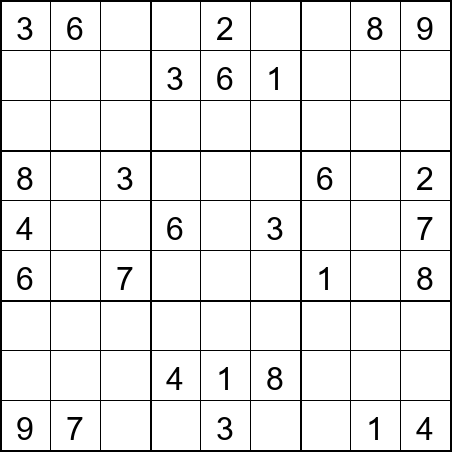

In [10]:
#dibujo el tablero

from PIL import Image, ImageDraw, ImageFont

width, height = 452, 452 #+2 para borde, defino ancho y alto
tablero = Image.new('RGB', (width, height), color='white')
draw = ImageDraw.Draw(tablero)

line_color = (0, 0, 0)  #color de las líneas

for x in range(0, width, width // 9): #dibujamos las lineas
    line_width = 2 if x % 3 == 0 else 1
    draw.line([(x, 0), (x, height)], fill=line_color, width=line_width)
    draw.line([(0, x), (width, x)], fill=line_color, width=line_width)

font_size = 32
font = ImageFont.truetype("arial.ttf", font_size)  
text_color = (0, 0, 0)  #color de los números del tablero inicial

for fila in range(9):
    for col in range(9):
        if tablero_elegido[fila][col] != 0:
            numero = str(tablero_elegido[fila][col])
            text_width, text_height = draw.textsize(numero, font=font)
            x = col * (width // 9) + (width // 18) - text_width // 2
            y = fila * (height // 9) + (height // 18) - text_height // 2
            draw.text((x, y), numero, fill=text_color, font=font)
tablero #muestro el tablero

In [ ]:
#vamos a jugar

import IPython.display

tablerito = tablero.copy() #copio la imagen del tablero por si acaso
draw = ImageDraw.Draw(tablerito) #empiezo a dibujar en tablerito
celdas_de_pista = []

def jugar_sudoku(tablero_copiado, celdas_de_pista):
    while disponibles(tablero_copiado): #mientras hayas celdas disponibles
        IPython.display.clear_output(wait=True) #limpio la pantalla
        try:
            fila = int(input("Ingrese la fila (1-9) donde desea colocar un número (0 para una pista, 10 para borrar): "))
            col = int(input("Ingrese la columna (1-9) donde desea colocar un número (0 para una pista, 10 para borrar): "))
            num = int(input("Ingrese el número que desea colocar (1-9 (0 para una pista, 10 para borrar)): "))
        except ValueError:
            print("Por favor, ingrese números válidos.")
            continue

        if fila == 0 and col == 0 and num == 0: #mientras los 3 valores sean 0
            celdas_de_pista, celda, solucion = generar_pista(tablero_copiado, celdas_de_pista)
            if celdas_de_pista:
                print("Pista generada exitosamente")
                pista_color = (255, 51, 255)  #rosado para diferenciar las pistas
                cell_size = width // 9 
                text_width, text_height = draw.textsize(solucion, font) 
                x = celda[1] * cell_size + (cell_size - text_width) // 2 #escribo las pistas
                y = celda[0] * cell_size + (cell_size - text_height) // 2
                draw.text((x, y), solucion, fill=pista_color, font=font)
            else:
                print("No se puede generar una pista")

        if fila == 10 and col == 10 and num == 10: #para borrar, mientras los 3 números sean 10
            IPython.display.display(tablerito) #muestro nuevamente el tablero
            fila_borrada, col_borrada = borrar_celda(tablero_copiado, celdas_de_pista) #llama a borrar

        if 1 <= fila <= 9 and 1 <= col <= 9 and 1 <= num <= 9: #cuando se ingresen números para jugar
            if tablero_copiado[fila - 1][col - 1] == 0 and validar_movimiento(tablero_copiado, fila - 1, col - 1, num):
                num_str = str(num) #lo vuelvo texto para poder dibujarlo
                print("Jugada exitosa")
                text_width, text_height = draw.textsize(num_str, font=font)
                juego_color = (0, 0, 255) #letras azules jugadas por el usuario
                x = (col - 1) * (width // 9) + (width // 18) - text_width // 2
                y = (fila - 1) * (height // 9) + (height // 18) - text_height // 2
                draw.text((x, y), num_str, fill=juego_color, font=font)

            else:
                print("Movimiento inválido. Por favor, inténtelo de nuevo")
            
        IPython.display.display(tablerito) #muestro el tablero al final de cada ciclo
        
    if tablero_resuelto: #cuando ya no hayan celdas disponibles
        if comparar_tableros(tablero_resuelto, tablero_copiado): #ganó el juego
            print("Felicidades, ¡ganaste!")
        else:
            print("Sigue intentándolo") #no ganó, tableros distintos
    else:
        print("No se pudo resolver el Sudoku.")

if __name__ == "__main__": 
    jugar_sudoku(tablero_copiado, celdas_de_pista) #llamo a jugar sudoku